In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from env import user, password, host
import wrangle_zillow

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')


### Wrangle FIPS data in order to identify county for each data point
(refer to prep.py for info on how data was wrangled and cleaned)

In [40]:
county_df = wrangle_zillow.wrangle_county_fips()

In [41]:
# 3 Different Counties:  Los Angeles County, Orange County, and Ventura County
county_df

,County
fips_number,
6037,Los Angeles County
6059,Orange County
6111,Ventura County


### Wrangle zillow data
(refer to wrangle_zillow.py for info on how data was wrangled and cleaned)

In [42]:
zillow_df = wrangle_zillow.wrangle_zillow_data()

In [43]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,lot_size,fips
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,6211.0,Los Angeles County
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,9109.0,Los Angeles County
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,7538.0,Los Angeles County
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,111564.0,Los Angeles County
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,10497.0,Los Angeles County


#### Add property tax rate column by dividing property tax by house_value

In [44]:
zillow_df['property_tax_rate'] = (zillow_df.property_tax / zillow_df.house_value) * 100

In [45]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,lot_size,fips,property_tax_rate
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,6211.0,Los Angeles County,1.222004
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,9109.0,Los Angeles County,1.214647
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,7538.0,Los Angeles County,1.647587
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,111564.0,Los Angeles County,1.237103
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,10497.0,Los Angeles County,1.207256


### Change FIPS number to name of County in zillow_df DataFrame

In [46]:
la_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Los Angeles County']
orange_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Orange County']
ventura_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Ventura County']
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,lot_size,fips,property_tax_rate
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,6211.0,Los Angeles County,1.222004
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,9109.0,Los Angeles County,1.214647
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,7538.0,Los Angeles County,1.647587
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,111564.0,Los Angeles County,1.237103
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,10497.0,Los Angeles County,1.207256


### Data Visualizations:  Distribution of tax rates by County

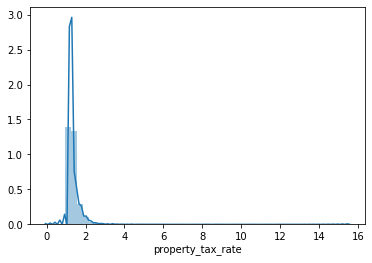

In [47]:
la_county_tax_rates_distplot = sns.distplot(la_county_tax_rates)

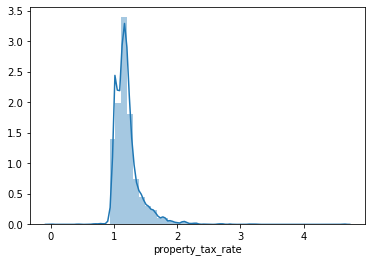

In [48]:
orange_county_tax_rates_displot = sns.distplot(orange_county_tax_rates)

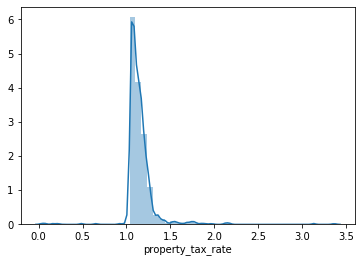

In [49]:
ventura_county_tax_rates_displot = sns.distplot(ventura_county_tax_rates)

### Split the data into train and test
(refer to split_scale.py for splitting and scaling functions)

In [50]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,lot_size,fips,property_tax_rate
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,6211.0,Los Angeles County,1.222004
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,9109.0,Los Angeles County,1.214647
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,7538.0,Los Angeles County,1.647587
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,111564.0,Los Angeles County,1.237103
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,10497.0,Los Angeles County,1.207256


In [51]:
df = zillow_df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']]
X = zillow_df[['bedrooms', 'bathrooms', 'square_feet']]
y = zillow_df[['house_value']]

In [52]:
df.head()

,bedrooms,bathrooms,square_feet,house_value
0,4.0,2.0,1604.0,498347.0
1,3.0,3.0,2384.0,549917.0
2,3.0,2.0,1574.0,235272.0
3,2.0,2.0,1619.0,340000.0
4,2.0,3.0,2408.0,2017254.0


In [53]:
import split_scale

In [54]:
train, test = split_scale.split_my_data(df)

### Scaling data:

In [55]:
scaler, train_scaled, test_scaled = split_scale.iqr_robust_scaler(train, test)

In [56]:
train_scaled.head()

,bedrooms,bathrooms,square_feet,house_value
10253,0.0,1.0,1.980541,2.868838
2317,0.0,-1.0,-0.125405,-0.301693
1410,0.0,0.0,0.495135,-0.148288
6906,0.0,0.0,0.475676,0.265497
2946,0.0,0.0,-0.004324,-0.709416


In [57]:
X_train_scaled = train_scaled[['bedrooms', 'bathrooms', 'square_feet']]
y_train = train[['house_value']]

In [58]:
X_test = test.drop(columns='house_value')
y_test = test[['house_value']]

In [59]:
(X_train_scaled.isnull()).sum()

bedrooms       0
bathrooms      0
square_feet    0
dtype: int64

### Exploration:

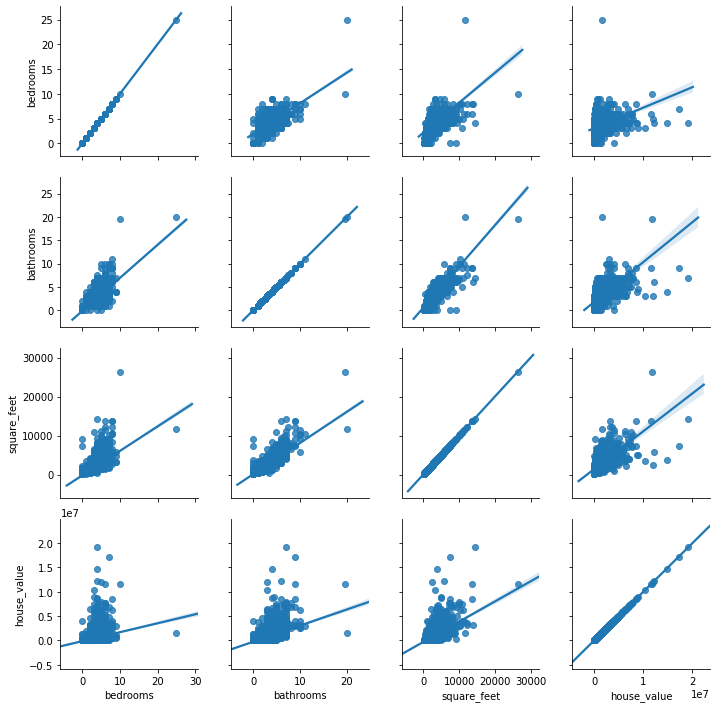

In [60]:
# explore_zillow.plot_variable_pairs(df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']])

g=sns.PairGrid(df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']])
g.map(sns.regplot)
plt.show()

(0, 4)

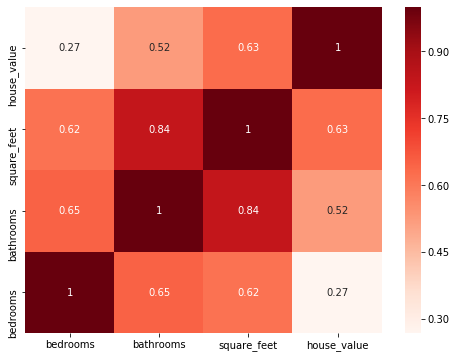

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(train_scaled.corr(), cmap='Reds', annot=True)
plt.ylim(0, 4)

In [62]:
import statsmodels.api as sm

ols_model = sm.OLS(y_train, X_train_scaled)

res = sm.OLS(y_train, X_train_scaled).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            house_value   R-squared (uncentered):                   0.413
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              2985.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):                        0.00
Time:                        05:57:16   Log-Likelihood:                     -1.8794e+05
No. Observations:               12745   AIC:                                  3.759e+05
Df Residuals:                   12742   BIC:                                  3.759e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -7.587e+04   7576.709    -10.013      0.000   -9.07e+04    -6.1e+04
bathrooms    1.491e+04   1.04e+04      1.439      0.150   -5400.619    3.52e+04
square_feet  5.075e+05   9581.810     52.968      0.000    4.89e+05    5.26e+05
==============================================================================
Omnibus:                    16543.554   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10194168.074
Skew:                           6.784   Prob(JB):                         0.00
Kurtosis:                     140.886   Cond. No.                         3.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression - Fitting linear model to the Zillow data

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

lm1 = linear_model.BayesianRidge()

In [64]:
predictions=pd.DataFrame({'actual':y_train.house_value}).reset_index(drop=True)

lm1=LinearRegression()
lm1.fit(X_train_scaled[['bedrooms', 'bathrooms', 'square_feet']],y_train)
lm1_predictions=lm1.predict(X_train_scaled[['bedrooms', 'bathrooms', 'square_feet']])
predictions['lm1']=lm1_predictions

In [65]:
#baseline model
predictions['baseline'] = y_train.mean()[0]
predictions.head()

,actual,lm1,baseline
0,1309949.0,1.280955e+06,463822.099098
1,213982.0,2.666766e+05,463822.099098
2,267010.0,5.876875e+05,463822.099098
3,410044.0,5.793118e+05,463822.099098
4,73043.0,3.727095e+05,463822.099098


In [66]:
lm1_y_intercept = lm1.intercept_
print("intercept: ", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("coefficients: ", lm1_coefficients)

intercept:  [374570.81707382]
coefficients:  [[-143407.61505426   53917.04668205  430421.29656301]]


In [67]:
print('{} = b + m1 * {} + m2 * {} + m3 * {}'.format(y_train.columns[0], X_train_scaled.columns[0],X_train_scaled.columns[1],X_train_scaled.columns[2]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])
print('    coefficient (m3): %.2f' % lm1_coefficients[0][2])

house_value = b + m1 * bedrooms + m2 * bathrooms + m3 * square_feet
    y-intercept  (b): 374570.82
    coefficient (m1): -143407.62
    coefficient (m2): 53917.05
    coefficient (m3): 430421.30


In [68]:
y_pred_lm1 = lm1.predict(X_train_scaled)
y_pred_lm1

array([[1280954.69111094],
       [ 266676.61320116],
       [ 587687.52391259],
       ...,
       [ 292209.12032608],
       [ 302911.48770008],
       [ 300030.60946964]])

In [69]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1))

linear model
  mean squared error: 2.47e+11


In [70]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_lm1)
r2
# print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm1))

0.4202979132914685

In [71]:
from math import sqrt
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

y_pred_baseline = np.array([y_train.mean()[0]]*len(y_train))
MSE = mean_squared_error(y_train, y_pred_baseline)
SSE = MSE*len(y_train)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train, y_pred_baseline)
# print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(evs))

In [72]:
y_train = y_train.house_value

In [73]:
y_pred_lm1.ravel()

array([1280954.69111094,  266676.61320116,  587687.52391259, ...,
        292209.12032608,  302911.48770008,  300030.60946964])

In [74]:
y_pred_baseline.ravel()

array([463822.09909769, 463822.09909769, 463822.09909769, ...,
       463822.09909769, 463822.09909769, 463822.09909769])

Text(0.5, 1, 'Predicted vs Actual Zestimate')

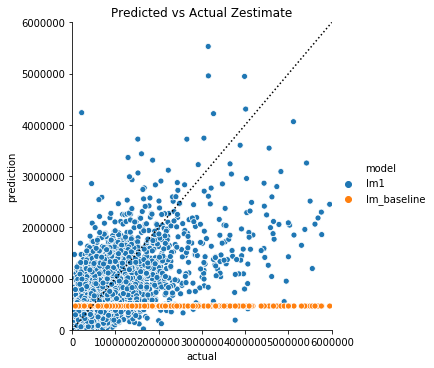

In [75]:
pd.DataFrame({'actual': y_train,
              'lm1': y_pred_lm1.ravel(),
              'lm_baseline': y_pred_baseline.ravel()})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')
min = 0
max = 6_000_000
plt.plot([min, max],[min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Zestimate')

### How much is explained by model vs how much is noise?  R2
New features;

    sqft / bedrooms
    sqft / bathrooms
    
Needed to have a model fast.  So why did I chose the features I have??  Because it was easy